# Positional Encoding

This notebook is a hands-on code walkthrough of how positional encoding is defined. 

In [1]:
import math
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [2]:
import torch
import torch.nn as nn

### Positional Encodings Formula

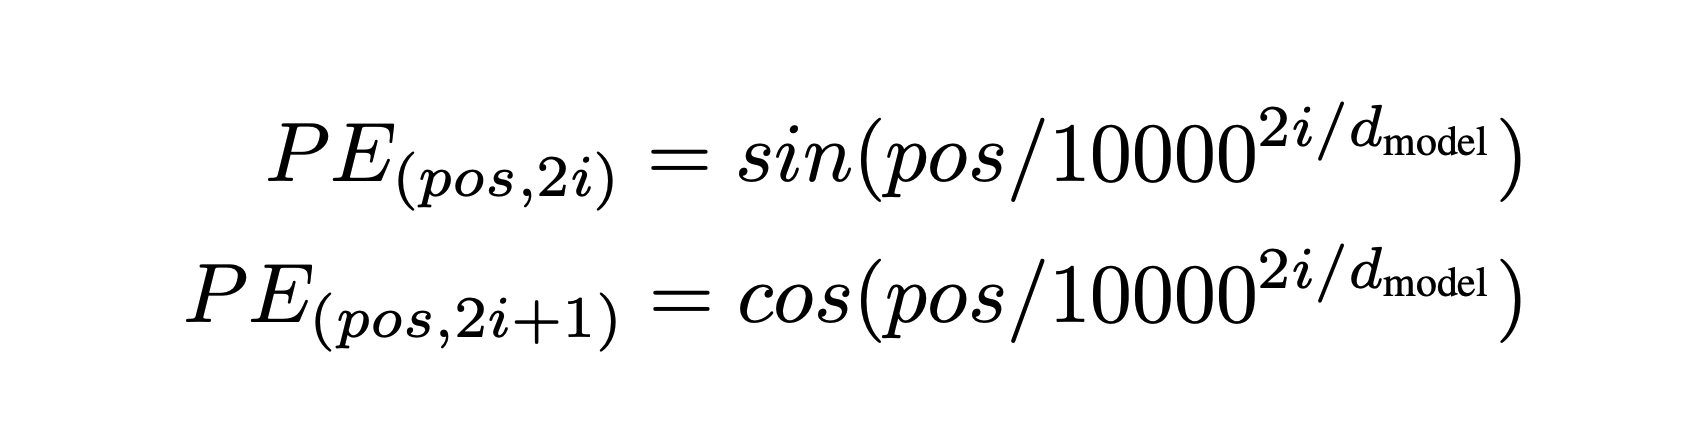

In [3]:
display(Image(filename='images/PositionalEncodings.png'))

- pos = position of each word in the sequence
- i = index of the dimension
- d_model = dimension/embedding length (typically 512)

- we are using sin/cos because of periodicity and constrained values.

In [4]:
max_sequence_length = 10 #Typically in the 1000s
d_model = 6 #Typically 512 based on paper.

In [5]:
even_i = torch.arange(0, d_model, 2).float()
even_i

tensor([0., 2., 4.])

In [6]:
even_denominator = torch.pow(1000, even_i/d_model)
even_denominator

tensor([  1.0000,  10.0000, 100.0000])

In [7]:
odd_i = torch.arange(1, d_model, 2).float()
odd_i

tensor([1., 3., 5.])

In [9]:
part1 = torch.arange(0, d_model, 2).float()
denominator = torch.pow(1000, part1/d_model)

position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [10]:
denominator

tensor([  1.0000,  10.0000, 100.0000])

In [11]:
position / denominator

tensor([[0.0000, 0.0000, 0.0000],
        [1.0000, 0.1000, 0.0100],
        [2.0000, 0.2000, 0.0200],
        [3.0000, 0.3000, 0.0300],
        [4.0000, 0.4000, 0.0400],
        [5.0000, 0.5000, 0.0500],
        [6.0000, 0.6000, 0.0600],
        [7.0000, 0.7000, 0.0700],
        [8.0000, 0.8000, 0.0800],
        [9.0000, 0.9000, 0.0900]])

In [12]:
even_PE = torch.sin(position / denominator)
odd_PE = torch.cos(position / denominator)

In [13]:
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0998,  0.0100],
        [ 0.9093,  0.1987,  0.0200],
        [ 0.1411,  0.2955,  0.0300],
        [-0.7568,  0.3894,  0.0400],
        [-0.9589,  0.4794,  0.0500],
        [-0.2794,  0.5646,  0.0600],
        [ 0.6570,  0.6442,  0.0699],
        [ 0.9894,  0.7174,  0.0799],
        [ 0.4121,  0.7833,  0.0899]])

In [14]:
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9950,  0.9999],
        [-0.4161,  0.9801,  0.9998],
        [-0.9900,  0.9553,  0.9996],
        [-0.6536,  0.9211,  0.9992],
        [ 0.2837,  0.8776,  0.9988],
        [ 0.9602,  0.8253,  0.9982],
        [ 0.7539,  0.7648,  0.9976],
        [-0.1455,  0.6967,  0.9968],
        [-0.9111,  0.6216,  0.9960]])

In [15]:
even_PE.shape, odd_PE.shape

(torch.Size([10, 3]), torch.Size([10, 3]))

In [16]:
# We want to interleave the index(s) from both the odd and even lists
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [17]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0998,  0.9950,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.1987,  0.9801,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.2955,  0.9553,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.3894,  0.9211,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.4794,  0.8776,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.5646,  0.8253,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.6442,  0.7648,  0.0699,  0.9976],
        [ 0.9894, -0.1455,  0.7174,  0.6967,  0.0799,  0.9968],
        [ 0.4121, -0.9111,  0.7833,  0.6216,  0.0899,  0.9960]])

# Creating intuition behind Positional Encodings

In [20]:
# For Even Positions = sin(pos/10000^(2i/d_model))
# For Odd Positions  = cos(pos/10000^(2i/d_model))

In [76]:
d_model = 4 #Dimensional representation of each work/token. Usually 512.
max_sequence_length = 10 #Corresponds to the number of maximun number of words/tokens allowed in the model. 

In [77]:
sentence1=  "You shall know a word by the company it keeps" # Sentence length is 10. Same as max_sequence_length above.
sentence1 = sentence1.split()

# The below code creates an arbitrary embedding for each word
np.random.seed(0)
word_embeddings = [np.random.randint(0, 100, size=d_model) for i in range(0,max_sequence_length)]

print('Word Embeddings for "', sentence1, '"\n')
for i in range(0, len(sentence1)):
    print(sentence1[i], ': ', word_embeddings[i])


Word Embeddings for " ['You', 'shall', 'know', 'a', 'word', 'by', 'the', 'company', 'it', 'keeps'] "

You :  [44 47 64 67]
shall :  [67  9 83 21]
know :  [36 87 70 88]
a :  [88 12 58 65]
word :  [39 87 46 88]
by :  [81 37 25 77]
the :  [72  9 20 80]
company :  [69 79 47 64]
it :  [82 99 88 49]
keeps :  [29 19 19 14]


In [78]:
# torch.arrange(start_index, end_index, increments)
even_i = (torch.arange(0, d_model, 2).int()/2).int()
even_i

tensor([0, 1], dtype=torch.int32)

In [79]:
even_denominator = torch.pow(1000, even_i/d_model)
even_denominator

tensor([1.0000, 5.6234])

In [80]:
# torch.arrange(start_index, end_index, increments)
odd_i = (torch.arange(1, d_model, 2).int()/2).int()
odd_i

tensor([0, 1], dtype=torch.int32)

In [81]:
odd_denominator = torch.pow(1000, odd_i/d_model)
odd_denominator

tensor([1.0000, 5.6234])

In [82]:
position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [93]:
a = position / even_denominator
b = position / odd_denominator

In [94]:
a

tensor([[0.0000, 0.0000],
        [1.0000, 0.1778],
        [2.0000, 0.3557],
        [3.0000, 0.5335],
        [4.0000, 0.7113],
        [5.0000, 0.8891],
        [6.0000, 1.0670],
        [7.0000, 1.2448],
        [8.0000, 1.4226],
        [9.0000, 1.6005]])

In [95]:
b

tensor([[0.0000, 0.0000],
        [1.0000, 0.1778],
        [2.0000, 0.3557],
        [3.0000, 0.5335],
        [4.0000, 0.7113],
        [5.0000, 0.8891],
        [6.0000, 1.0670],
        [7.0000, 1.2448],
        [8.0000, 1.4226],
        [9.0000, 1.6005]])

In [96]:
even_PE = torch.sin(a)
odd_PE = torch.cos(b)

In [91]:
even_PE

tensor([[ 0.0000,  0.0000],
        [ 0.8415,  0.1769],
        [ 0.9093,  0.3482],
        [ 0.1411,  0.5085],
        [-0.7568,  0.6528],
        [-0.9589,  0.7765],
        [-0.2794,  0.8757],
        [ 0.6570,  0.9473],
        [ 0.9894,  0.9890],
        [ 0.4121,  0.9996]])

In [85]:
odd_PE

tensor([[ 1.0000,  1.0000],
        [ 0.5403,  0.9842],
        [-0.4161,  0.9374],
        [-0.9900,  0.8610],
        [-0.6536,  0.7575],
        [ 0.2837,  0.6301],
        [ 0.9602,  0.4828],
        [ 0.7539,  0.3203],
        [-0.1455,  0.1476],
        [-0.9111, -0.0297]])

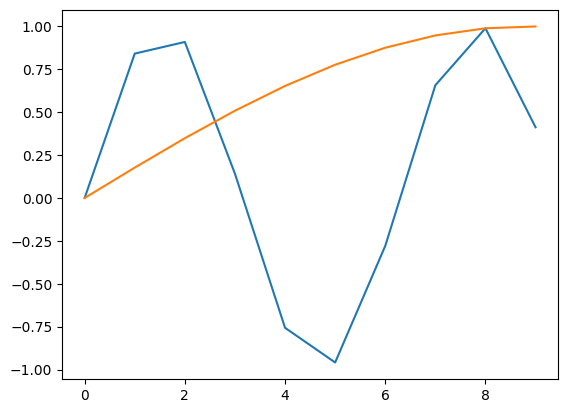

In [97]:
plt.plot(even_PE)

In [87]:
# We want to interleave the index(s) from both the odd and even lists
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 2, 2])

In [88]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.1769,  0.9842],
        [ 0.9093, -0.4161,  0.3482,  0.9374],
        [ 0.1411, -0.9900,  0.5085,  0.8610],
        [-0.7568, -0.6536,  0.6528,  0.7575],
        [-0.9589,  0.2837,  0.7765,  0.6301],
        [-0.2794,  0.9602,  0.8757,  0.4828],
        [ 0.6570,  0.7539,  0.9473,  0.3203],
        [ 0.9894, -0.1455,  0.9890,  0.1476],
        [ 0.4121, -0.9111,  0.9996, -0.0297]])

In [109]:
PE.shape

torch.Size([10, 4])

In [112]:
PE[:,0]

tensor([ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568, -0.9589, -0.2794,  0.6570,
         0.9894,  0.4121])

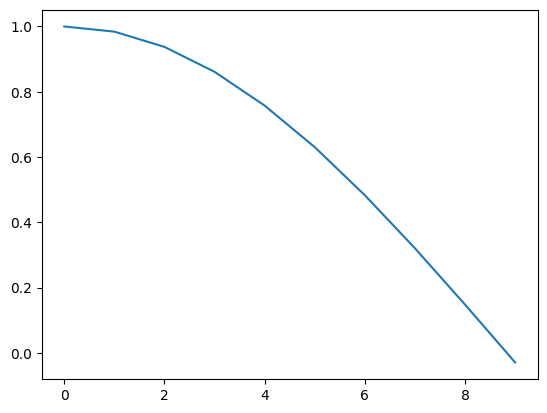

In [116]:
plt.plot(PE[:,3])

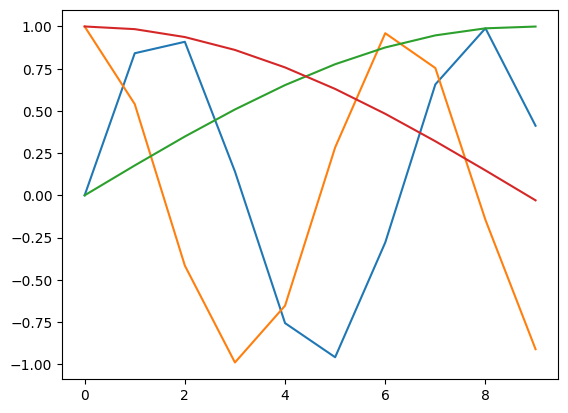

In [100]:
plt.plot(PE)

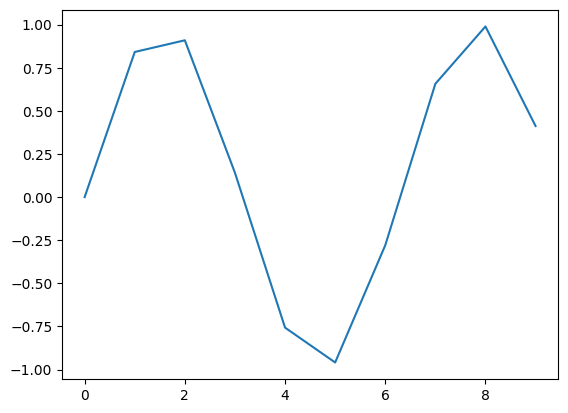

In [108]:
plt.plot(np.sin(np.arange(0,10)))

# Combining everything above to create re-usable functions

In [18]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        part1 = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(1000, part1/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [19]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0998,  0.9950,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.1987,  0.9801,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.2955,  0.9553,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.3894,  0.9211,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.4794,  0.8776,  0.0500,  0.9988],
        [-0.2794,  0.9602,  0.5646,  0.8253,  0.0600,  0.9982],
        [ 0.6570,  0.7539,  0.6442,  0.7648,  0.0699,  0.9976],
        [ 0.9894, -0.1455,  0.7174,  0.6967,  0.0799,  0.9968],
        [ 0.4121, -0.9111,  0.7833,  0.6216,  0.0899,  0.9960]])